# Aula 4 - Exercícios - Agregação com Pandas e Conceitos de Estatística
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np

### 4.1 Escreva uma função para ler os dados de PIB e população dos datasets disponibilizados e retornar um dataframe com a agregação por Estados e as métricas soma, média e mediana do PIB de 2017 e da população de todos os Estados brasileiros.
#### Você pode se basear na sua resolução dos exercícios da Aula 3.


In [2]:
# Dica: Baseie seu código na sua solução do exercício da aula 3 que faz o merge dos
#       datasets do PIB e da população.

def aggregate_pib_pop(path_pop, path_pib):
    """retorne um dataframe com a agregação por Estados e as métricas soma, média, mediana
       e o desvio padrão do PIB de 2017 e da população de todos os Estados brasileiros.
    """
    # YOUR CODE HERE
    try:
        df_pib = pd.read_excel(path_pib, skiprows=3, skipfooter=1, index_col=0, dtype={'Unnamed: 1': str})
        df_pib.rename(columns={'Unnamed: 1' : 'cod_ibge7', 'Unnamed: 2' : 'municipio'}, inplace=True)        
        
        df_pop = pd.read_excel(path_pop, dtype={'cod_uf': str, 'cod_munic': str})
        df_pop['cod_ibge7'] = df_pop['cod_uf'] + df_pop['cod_munic']
        
        df_merged = pd.merge(df_pop, df_pib, on='cod_ibge7')
        return df_merged.groupby(df_merged['uf']).agg({'pop2017':['sum', 'mean', 'median', 'std'] , \
                                                       '2017': ['sum', 'mean', 'median', 'std']})
    except ValueError as e:
        
        raise NotImplementedError(e)



In [3]:
## Faça seus testes aqui
path_pib = '../../curso_ciencia_dados2020/data/originais/pib/pib_municipios.xlsx'
path_pop='../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'

aggregate_pib_pop(path_pop, path_pib).loc['AC'].to_dict()


{('pop2017', 'sum'): 829619.0,
 ('pop2017', 'mean'): 37709.954545454544,
 ('pop2017', 'median'): 17903.5,
 ('pop2017', 'std'): 79035.97564911412,
 ('2017', 'sum'): 14271061.0,
 ('2017', 'mean'): 648684.5909090909,
 ('2017', 'median'): 229775.0,
 ('2017', 'std'): 1695166.9475680576}

In [4]:
# Validação para nota
path_pib = '../../curso_ciencia_dados2020/data/originais/pib/pib_municipios.xlsx'
path_pop='../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {('pop2017', 'sum'): 829619.0,  ('pop2017', 'mean'): 37709.954545454544,
             ('pop2017', 'median'): 17903.5, ('pop2017', 'std'): 79035.97564911412,
             ('2017', 'sum'): 14271061.0, ('2017', 'mean'): 648684.5909090909,
             ('2017', 'median'): 229775.0, ('2017', 'std'): 1695166.9475680576}

assert aggregate_pib_pop(path_pop, path_pib).loc['AC'].to_dict() == test_data

### 4.2 Escreva uma função para calcular os percentis [0.25, 0.50, 0.75, 0.9] do dataset do índice de gini dos municípios brasileiros para todos os anos presents no dataset.

#### Apenas por curiosidade, plote o gráfico destes percentis num gráfico de linhas


In [5]:
# Dica 1: Descubra qual a string representa valores NA neste dataset.
# Dica 2: Use o argumento na_values para especificar a string que representa valores NA.
# Dica 3: Use o argumento decimal=',' para definir a vírgula como separador de decimal.
# Dica 4: Use a função apply e uma função lambda para desmembrar a coluna município no
#         respectivo nome e código do município.
# Dica 5: Atente para o separador de colunas do dataset.
# Dica 6: O encoding do dataset do gini é 'utf8'.
# Dica 7: Atente para quantas linhas você deve ignorar antes no inicio e no final do arquivo.

def plot_gini(path_gini):
    """retorne o valor de: n+nn+nnn
    """
    # YOUR CODE HERE
    try:
        df_gini = pd.read_csv(path_gini, sep=';', na_values='...', skiprows=2, skipfooter=1, \
                              decimal = ',', \
                              dtype={'1991': float, '2000': float, '2010': float}, engine='python')

        df_gini['cod_ibge6'] = df_gini['Município'].apply( lambda x: x.split(' ')[0] )
        return round(df_gini.quantile([.25, .5, .75, .9]), 3)
        
    except ValueError as e:
        raise NotImplementedError(e)


In [6]:
## Faça seus testes aqui
# Considere o seguinte dataframe do PIB dos municípios
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

plot_gini(path_gini)

,1991,2000,2010
0.25,0.486,0.510,0.459
0.50,0.531,0.554,0.503
0.75,0.575,0.597,0.546
0.90,0.617,0.639,0.585


In [7]:
# Validação para nota
test_data = {'1991': {0.25: 0.48625, 0.5: 0.5314, 0.75: 0.5751, 0.9: 0.617}, 
             '2000': {0.25: 0.5096, 0.5: 0.5535, 0.75: 0.59715, 0.9: 0.6387}, 
             '2010': {0.25: 0.4587, 0.5: 0.5025, 0.75: 0.5459, 0.9: 0.5848}}
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

assert plot_gini(path_gini).to_dict() == test_data

AssertionError: 

<AxesSubplot:xlabel='Ano', ylabel='percentil'>

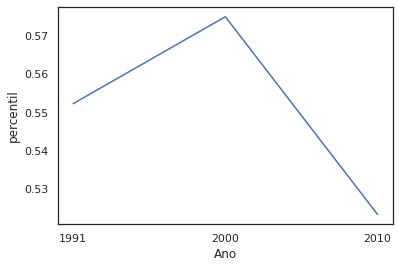

In [23]:
import seaborn as sea
import matplotlib.pyplot as plt
sns.set(style='white')
%matplotlib inline

df_melt = plot_gini(path_gini).melt(value_vars=['1991', '2000', '2010'], \
                                    var_name='Ano', value_name='percentil', ignore_index=False )
sea.lineplot(x='Ano', y='percentil', data=df_melt, ci=None)

### 4.3 Escreva uma função para retornar um dataframe com os nomes das colunas, o total e a porcentagem de valores NA num dataframe passado como argumento para esta função.


In [24]:
# Dica: Use a função concat para concatenar duas séries. Especifique axis=1 para concatenar
#       por colunas. Se quiser dar nome as colunas depois de concatenar, utilize o argumento
#       keys=['Total','Porcentage']

def missing_percentage(df):
    """Retorna um dataframe com os nomes das colunas, o total e a porcentagem de valores
       NA no dataframe
    """
    # YOUR CODE HERE
    try:
        
        df_metricas = pd.DataFrame({'Total': df.isna().sum(),\
                                    'Porcentage': round( (df.isna().sum() / len(df.index))*100, 2) })
        return df_metricas.sort_values(by='Total', ascending=False)
        
    except ValueError as e:
        raise NotImplementedError(e)


In [25]:
## Faça seus testes aqui
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
df_titanic = pd.read_excel(path_titanic)
missing_percentage(df_titanic)

,Total,Porcentage
body,1188,90.76
cabin,1014,77.46
boat,823,62.87
home.dest,564,43.09
age,263,20.09
embarked,2,0.15
fare,1,0.08
pclass,0,0.00
survived,0,0.00
name,0,0.00


In [26]:
# Validação para nota
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
test_data = {'Total': {'body': 1188,  'cabin': 1014,  'boat': 823,  'home.dest': 564,
                       'age': 263,  'embarked': 2,  'fare': 1,  'ticket': 0,  'parch': 0,  
                       'sibsp': 0,  'sex': 0,  'name': 0,  'survived': 0,  'pclass': 0},
             'Porcentage': {'body': 90.76,  'cabin': 77.46,  'boat': 62.87,
                            'home.dest': 43.09,  'age': 20.09,  'embarked': 0.15, 
                            'fare': 0.08,  'ticket': 0.0,  'parch': 0.0,  'sibsp': 0.0,
                            'sex': 0.0,  'name': 0.0,  'survived': 0.0,  'pclass': 0.0}}

df_titanic = pd.read_excel(path_titanic)
assert missing_percentage(df_titanic).to_dict() == test_data

### 4.4 Escreva uma função para agregar o dataset do Titanic por classe (pclass) e sexo (sex) e calcular a soma da coluna survived (sobrevivente) e a média e mediana da coluna fare (preço do ticket).


In [27]:
def agg_titanic(df_titanic):
    """retorne aagregação do dataframe df_titanic por pclass e sex e calcular a soma 
       da coluna survived e a média e mediana da coluna fare.
    """
    # YOUR CODE HERE
    try:
        
        return df_titanic.groupby(['pclass', 'sex']).agg({'survived': ['sum'],\
                                                        'fare': ['mean', 'median']})
        
    except ValueError as e:
        raise NotImplementedError(e)


In [28]:
## Faça seus testes aqui
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'

df_titanic = pd.read_excel(path_titanic, skiprows=0, skipfooter=0)
agg_titanic(df_titanic)

survived        fare          
                   sum        mean    median
pclass sex                                  
1      female      139  109.412385  80.92915
       male         61   69.888385  49.50420
2      female       94   23.234827  23.00000
       male         25   19.904946  13.00000
3      female      106   15.324250  10.48960
       male         75   12.415462   7.89580

In [29]:
# Validação para nota
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
test_data = {('survived', 'sum'): {(1, 'female'): 139,  (1, 'male'): 61,  (2, 'female'): 94,
  (2, 'male'): 25,  (3, 'female'): 106,  (3, 'male'): 75}, ('fare', 'mean'): {(1, 'female'): 109.41238472222216,
  (1, 'male'): 69.88838491620106,  (2, 'female'): 23.234827358490563,  (2, 'male'): 19.90494561403509,
  (3, 'female'): 15.32424953703705,  (3, 'male'): 12.415461991869948}, ('fare', 'median'): {(1, 'female'): 80.92914999999999,
  (1, 'male'): 49.5042,  (2, 'female'): 23.0,  (2, 'male'): 13.0,  (3, 'female'): 10.4896,
  (3, 'male'): 7.8958}}

df_titanic = pd.read_excel(path_titanic)
assert agg_titanic(df_titanic).to_dict() == test_data

### 4.5 Escreva uma função para fazer o merge do dataset de morbidade consolidado com o dataset de população
#### O dataset da população deve ficar a esquerda e o dataset da morbidade a direita no resultado.

In [30]:
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_pop = pd.read_excel(path_pop, index_col=0, dtype={'cod_uf': str, 'cod_munic': str})
        df_pop['cod_ibge6'] = df_pop['cod_uf'] + df_pop['cod_munic'].apply(lambda row: row[:-1])

        
        df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', na_values='-', \
                                   dtype={'cod_ibge6': str})

        return pd.merge(df_pop, df_morbidade, on='cod_ibge6')
        
    except ValueError as e:
        
        raise NotImplementedError(e)


In [32]:
## Faça seus testes aqui
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'

merge_morbidade_pop(path_pop, path_morbidade).iloc[0, 0:11]


/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


uf                                                RO
cod_uf                                            11
cod_munic                                      00015
municipio                      Alta Floresta D'Oeste
pop2017                                        25437
cod_ibge6                                     110001
Município                      Alta Floresta D'Oeste
Internações                                      149
AIH_aprovadas                                    149
Valor_total                                   101282
Valor_serviços_hospitalares                  77693.1
Name: 0, dtype: object

In [33]:
# Validação para nota
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {'uf': 'RO', 'cod_uf': '11', 'cod_munic': '00015', 'municipio': "Alta Floresta D'Oeste",
             'pop2017': 25437, 'cod_ibge6': '110001', 'Município': "Alta Floresta D'Oeste",
             'Internações': 149.0, 'AIH_aprovadas': 149, 'Valor_total': 101282.26,
             'Valor_serviços_hospitalares': 77693.11}
df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
assert df_morbidade_pop.iloc[0, 0:11].to_dict() == test_data


### 4.6 Escreva uma função para realizar o agrupamento do dataset de morbidade por UF e por município aplicando a soma sobre as colunas Valor_total, Internações e Dias_permanência. Em seguida calcule, para todos os municípios nesta agregação, o custo médio diário das internações com a seguite fórmula: 
#### custo_medio_diario_intern = Valor_total/Dias_permanência

In [34]:
def custo_medio_internacao_agregado(df_morbidade_pop):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_agg = df_morbidade_pop.groupby(['uf', 'municipio']).agg({'Valor_total': 'sum', \
                                                           'Internações': 'sum', \
                                                          'Dias_permanência': 'sum'})
        df_agg['custo_medio_diario_intern'] = df_agg['Valor_total'] / df_agg['Dias_permanência']
        return df_agg
    except ValueError as e:
        
        raise NotImplementedError(e)

In [35]:
# Faça seus testes aqui
custo_medio_internacao_agregado(df_morbidade_pop)

Valor_total  Internações  Dias_permanência  \
uf municipio                                                  
AC Acrelândia      200333.42        233.0             989.0   
   Assis Brasil    146578.23        272.0            1023.0   
   Brasiléia       585471.50        699.0            2803.0   
   Bujari          124175.56        107.0             598.0   
   Capixaba        106787.38        150.0             611.0   
...                      ...          ...               ...   
TO Tocantínia      275693.72        342.0            1338.0   
   Tupirama         38785.90         50.0             182.0   
   Tupiratins       53131.70         49.0             189.0   
   Wanderlândia    200151.81        188.0            1194.0   
   Xambioá         445989.87        577.0            2661.0   

                 custo_medio_diario_intern  
uf municipio                                
AC Acrelândia                   202.561598  
   Assis Brasil                 143.282727  
   Brasiléia                    208.873172  
   Bujari                       207.651438  
   Capixaba                     174.774763  
...                                    ...  
TO Tocantínia                   206.049118  
   Tupirama                     213.109341  
   Tupiratins                   281.120106  
   Wanderlândia                 167.631332  
   Xambioá                      167.602356  

[5570 rows x 4 columns]

In [36]:
# Validação para nota
test_data = {'Valor_total': 200333.41999999998, 'Internações': 233.0, 'Dias_permanência': 989.0,
             'custo_medio_diario_intern': 202.56159757330636}
assert custo_medio_internacao_agregado(df_morbidade_pop).iloc[0].to_dict() == test_data

### 4.7 Escreva uma função para retornar um dataframe cujos valores de uma dada coluna sejam maiores do que um valor passado como argumento (threshold).
#### Para a validação, utilize o threshold=800. Por curiosidade, plote um boxplot dos dados de custo médio de internação agregados.

In [37]:
def get_outliers_morbidade(df_internacoes, col, threshold):
    """retorne um dataframe cujos valores da coluna col sejam maiores que threshold.
    """
    # YOUR CODE HERE
    try:
        return df_internacoes[df_internacoes[col] > threshold]
    except ValueError as e:
        raise NotImplementedError(e)

In [38]:
# Faça seus testes aqui
df_internacoes = custo_medio_internacao_agregado(df_morbidade_pop)
get_outliers_morbidade(df_internacoes, 'custo_medio_diario_intern', 800)


,,Valor_total,Internações,Dias_permanência,custo_medio_diario_intern
uf,municipio,,,,
MT,Nova Brasilândia,125334.12,41.0,113.0,1109.151504
PR,Campina Grande do Sul,14980883.47,2862.0,12045.0,1243.742920
SP,Pedranópolis,481705.94,95.0,488.0,987.102336


In [39]:
# Validação para nota
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
col='custo_medio_diario_intern'
threshold=800
test_data = {'Valor_total': 125334.12, 'Internações': 41.0, 'Dias_permanência': 113.0,
             'custo_medio_diario_intern': 1109.1515044247788}

df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
df_internacoes = custo_medio_internacao_agregado(df_morbidade_pop)

assert get_outliers_morbidade(df_internacoes, col, threshold).iloc[0].to_dict() == test_data

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
